In [3]:
# import libraries


# order of imports 1) cil, 2) all others numpy matploltib

from cil.optimisation.functions import TotalVariation
from cil.framework import ImageGeometry
from cil.utilities.dataexample import TestData

import matplotlib.pyplot as plt  # use plotter instead, islicer
import numpy as np

from skimage import data
from skimage.color import rgb2gray


In [4]:
# Load chelsea image from skimage
image = rgb2gray(data.chelsea())

In [5]:
# Setup the image domain and fill the image into an ImageData
ig = ImageGeometry(voxel_num_x=image.shape[1], voxel_num_y=image.shape[0])
data = ig.allocate()
data.fill(image)

In [10]:
# Add gaussian noise
noisy_data = TestData.random_noise(data, mode = 'gaussian', seed = 10, var = 0.005)

In [11]:
# Setup TotalVariation
TV = 0.1 * TotalVariation(max_iteration=2000)

# Run proximal operator for the TotalVariation
proxTV = TV.proximal(noisy_data, tau=1.0)

Initialised GradientOperator with C backend running with  20  threads


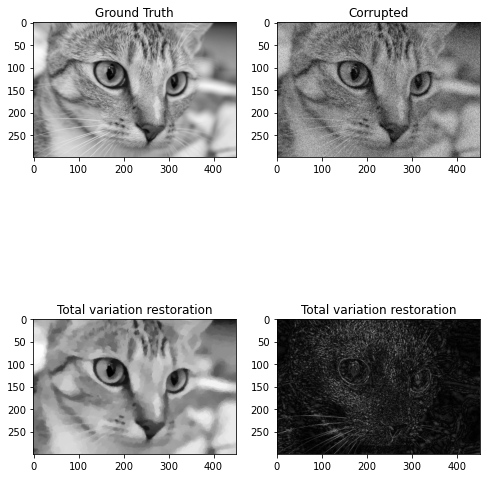

In [16]:
fig = plt.figure(figsize=(8, 10))
plt.subplot(2, 2, 1)
plt.imshow(data.as_array(), cmap="gray")
plt.title('Ground Truth')
plt.subplot(2, 2, 2)
plt.imshow(noisy_data.as_array(), cmap="gray")
plt.title('Corrupted')
plt.subplot(2, 2, 3)
plt.imshow(proxTV.as_array(), cmap="gray")
plt.title('Total variation restoration')
plt.subplot(2, 2, 4)
plt.imshow((proxTV - data).abs().as_array(), cmap="gray")
plt.title('Total variation restoration')
plt.show()